# Automatic geological modelling

This notebook uses map2loop to deconstruct a geological map into an input dataset for LoopStructural. The notebook is intended to be run as a part of the subsurface transform 21 workshop by Lachlan Grose and Mark Jessell. This notebook uses data provided by the Geological Survey of Western Australia ([license](licenses/gswalicence.pdf)).

Using this notebook you will:
* deconstruct a geological map using map2loop and augment the dataset for input into LoopStructural
* understand how the dataset is interpreted by LoopStructural
* build

In [68]:
import folium
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import numpy as np
from shapely.geometry import Polygon, shape
import geopandas
from shapely.geometry import shape 
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer


## Interactive map selector
Using the following interactive map select an area to build a model of or use the preselected area to build a model. Please note that the larger the area of the model does increase the computational time so select an area that is a similar size to the area we have provided. 

In [70]:
center=(-22.6,117.3)


wms_warox = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:waroxi_wa_4326_bed',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSWA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_warox)
# if(not test_data_name =='Draw Your Own'):
#     m.add_layer(example_rect)

### PREDEFINED AREA
existing_extent = (116.97971, -22.369087, 117.891692, -22.95456)
center = (existing_extent[1]+existing_extent[3])/2, (existing_extent[0]+existing_extent[2])/2
minlat = existing_extent[3]
maxlat = existing_extent[1]
minlong = existing_extent[2]
maxlong = existing_extent[0]
lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
mbbox = geopandas.GeoDataFrame(index=[0], crs=map_crs, geometry=[bbox_geom])
example_rect = GeoData(geo_dataframe = mbbox,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
mbbox=mbbox.to_crs(proj_crs)
m.add_layer(example_rect)


## END PREDEFINED AREA
m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [73]:
map_crs = 'EPSG:4326'
proj_crs = 'EPSG:28350'

In [74]:

draw = dc.last_draw
try:
    poly = shape(draw['geometry'])
    poly_gdf = geopandas.GeoDataFrame([1], geometry=[poly], crs=map_crs)
    bbox_gdf = poly_gdf.to_crs(proj_crs)
    bbox_3d = {"minx": np.min(bbox_gdf.loc[:,'geometry'][0].exterior.xy[0]),
         "miny": np.min(bbox_gdf.loc[:,'geometry'][0].exterior.xy[1]),
         "maxx": np.max(bbox_gdf.loc[:,'geometry'][0].exterior.xy[0]),
         "maxy": np.max(bbox_gdf.loc[:,'geometry'][0].exterior.xy[1]),
         "base": -3200,
         "top": 1200,}
except:
    minx = mbbox.total_bounds[0]
    maxx = mbbox.total_bounds[2]
    miny = mbbox.total_bounds[1]
    maxy = mbbox.total_bounds[3]# [ 274934.13200956 6297758.41393543  323980.90024616 6329307.64682912]
    bbox_3d = {'minx': minx,
     'miny': miny,
     'maxx': maxx,
     'maxy': maxy,
     'base': -3200,
     'top': 1200}

## Map2Loop


 orientations layer  metadata
--------------------
    bbox [ 453499.08395042 7490607.57099584  568837.58106787 7538288.1890561 ]
    CRS None
    # items 163
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 407283.29785219 7430805.86939398  680922.55097212 7598971.94825209]
    CRS None
    # items 122
    Data types ['MultiPolygon']

 fold layer  metadata
--------------------
    bbox [ 452022.00194231 7489883.51712614  569032.48349621 7538659.42725175]
    CRS None
    # items 19
    Data types ['LineString']
original no of faults: 91
geometry        LINESTRING (468313.07457342 7527815.18523806, ...
gml_id                                            linear_500k.969
objectid                                                      969
feature                                       Fault or shear zone
type                                                      exposed
fname                                                        None
code                     


 mindeps layer  metadata
--------------------
    bbox [ 452555.84765773 7489898.30186082  568255.43543365 7538189.3025719 ]
    CRS None
    # items 218
    Data types ['Point']

 mindeps layer  metadata
--------------------
    bbox [ 452555.84765773 7489898.30186082  568255.43543365 7538189.3025719 ]
    CRS None
    # items 218
    Data types ['Point']

Warnings:
     122 NaN/blank found in column "supersuite" of geology file, replacing with 0
     No fault dip estimate text for fault polylines
     No fault name for fault polylines
     91 NaN/blank found in column "dip_dir" of fault file, replacing with -999
     91 NaN/blank found in column "dip_est" of fault file, replacing with -999
No gaps between geology polygons
No overlaps between geology polygons

No errors found, clipped and updated files saved to tmp
Boolgeeda_Iron_Formation #B5E1FC
Boongal_Formation #EEEFE2
Brockman_Iron_Formation #84CDFA
Bunjinah_Formation #E6E7D3
Cheela_Springs_Basalt #B1FEB3
Fortescue_Group #8EE4B4

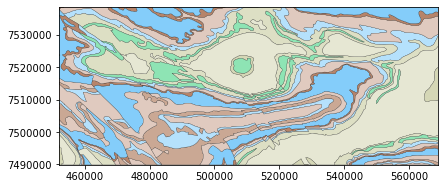

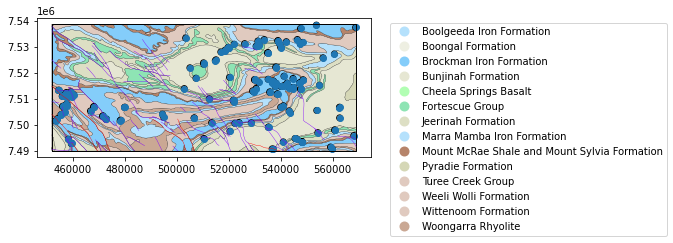

In [75]:
import os
import hjson
from map2loop.project import Project
%matplotlib inline
proj = Project( 

                 loopdata_state = "WA",)

proj.update_config(
                    out_dir='./test',
                    bbox_3d=bbox_3d,
                    proj_crs={'init': 'EPSG:28350'},
                    overwrite='true',
                  )

  0%|          | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
122  polygons
Successful parameter load
Output directory created at: ./test/graph
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
2    'Shingle Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
3    'Turee Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
4    'Boolgeeda Iron Formation'
5    'Boongal Formation'
6    'Brockman Iron Formation'
7    'Bunjinah Formation'
8    'Cheela Springs Basalt'
9    'Fortescue Group'
10    'Jeerinah Formation'
11    'Marra Mamba Iron Formation'
12    'Mount McRae Shale and Mount Sylvia Formation'
13    'Pyradie Formation'
14    'Turee Creek Group'
15    'Weeli Wolli Formation'
16    'Wittenoom Formation'
17    'Woongarra Rhyolite'
Topology figure saved to ./test/tmp/topology-fig.png


 10%|█         | 10/100 [00:04<00:36,  2.49it/s]

Done
Fetching DTM...  bbox:116.43287545387643 117.77210654282625 -22.797565734258317 -22.156223037892335
Attempt: 0 dtm geotif saved as ./test/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./test/dtm/dtm_rp.tif


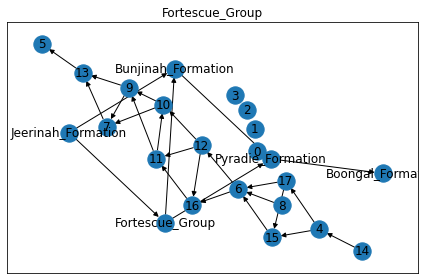

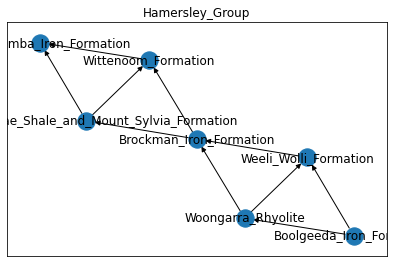

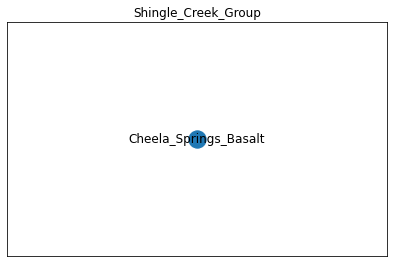

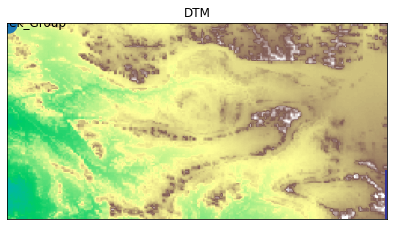

 30%|███       | 30/100 [00:05<00:10,  6.87it/s]

group choices: 2
dtb and dtb_null set to 0
159 orientations saved to ./test/output/orientations.csv


 50%|█████     | 50/100 [00:06<00:03, 12.76it/s]

extra orientations saved as /empty_series_orientations.csv
basal contacts saved allpts =  6392 deci_pts =  1617
saved as ./test/tmp/all_contacts.csv and ./test/tmp/contacts.csv
basal contacts without faults saved as ./test/tmp/basal_contacts.shp


 50%|█████     | 50/100 [00:19<00:03, 12.76it/s]

decimated contacts saved as ./test/output/contacts4.csv


 60%|██████    | 60/100 [00:20<00:18,  2.13it/s]

All observations n= 163
groups ['Hamersley Group' 'Fortescue Group' 'Turee Creek Group'
 'Shingle Creek Group'] 
codes ['Wittenoom Formation' 'Mount McRae Shale and Mount Sylvia Formation'
 'Woongarra Rhyolite' 'Weeli Wolli Formation' 'Fortescue Group'
 'Marra Mamba Iron Formation' 'Brockman Iron Formation'
 'Boolgeeda Iron Formation' 'Turee Creek Group' 'Jeerinah Formation'
 'Bunjinah Formation' 'Pyradie Formation' 'Boongal Formation'
 'Cheela Springs Basalt']


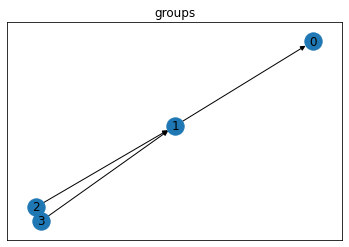

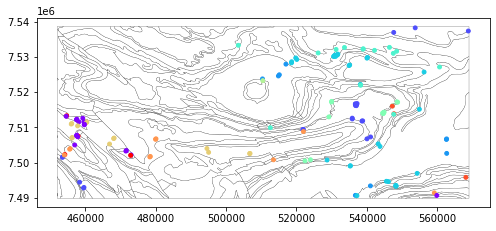

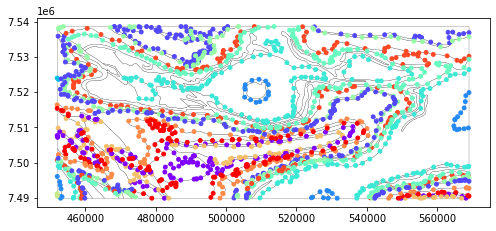

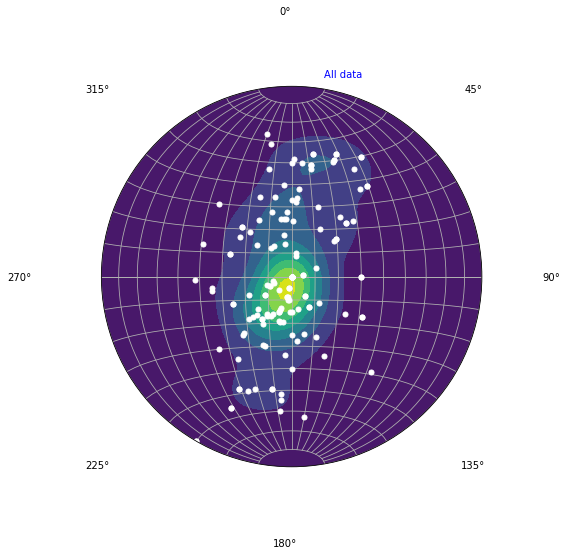

----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations n= 97
strike/dip of girdle 197.8111423585072 / 87.09538833946334


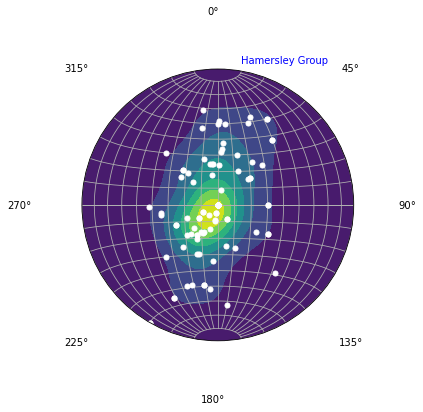

----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations n= 51
strike/dip of girdle 185.51707149770567 / 86.4550624744833


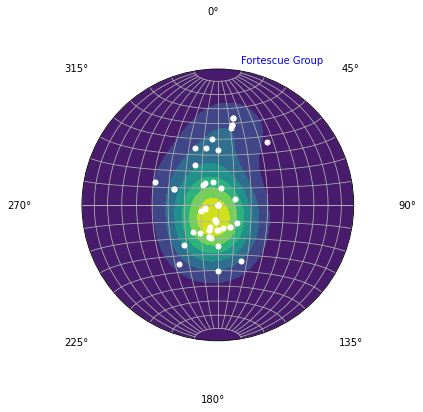

----------------------------------------------------------------------------------------------------------------------
Turee Creek Group observations n= 15
strike/dip of girdle 15.213243551265805 / 84.52041511780811


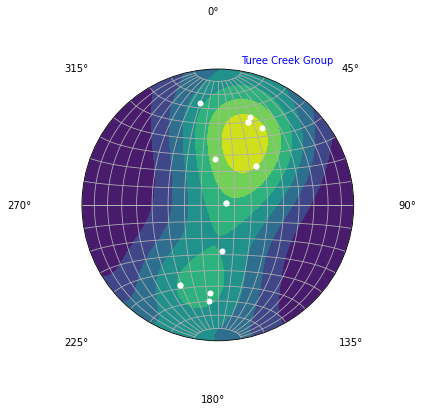

----------------------------------------------------------------------------------------------------------------------
Shingle Creek Group observations has no observations
rbf_split 0 23031
['Hamersley Group', 'Fortescue Group', 'Turee Creek Group', 'Shingle Creek Group']
235 98
interpolated dips


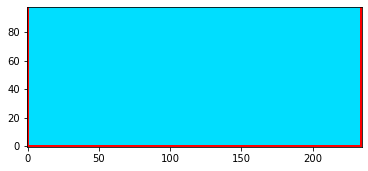

interpolated dip directions


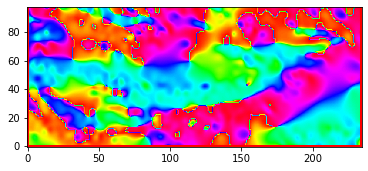

interpolated contacts


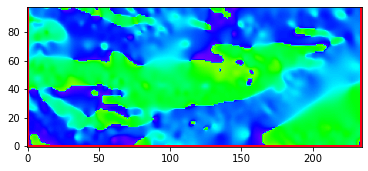

 70%|███████   | 70/100 [00:43<00:29,  1.00it/s]

fault orientations saved as ./test/output/fault_orientations.csv
fault positions saved as ./test/output/faults.csv
fault dimensions saved as ./test/output/fault_dimensions.csv


 90%|█████████ | 90/100 [02:24<00:28,  2.85s/it]

Fault Fault_6705 with displacement of 2645 capped to 434.1811549370327
Fault Fault_6705 with displacement of 1875 capped to 434.1811549370327
fault displacement estimates saved as ./test/output/fault_displacements3.csv
near-fault orientations saved as ./test/tmp/ex_f_combo_full.csv
near-fault orientations saved as ./test/tmp/ex_f_combo_full.csv
0 Turee_Creek_Group
1 Shingle_Creek_Group
2 Hamersley_Group
3 Fortescue_Group
pluton contacts and orientations saved as:
./test/output/ign_contacts.csv
./test/output/ign_orientations_domes.csv
Propagating dips along contacts...
132
1200 points saved to ./test/tmp/raw_contacts.csv
718 thickness estimates saved as ./test/output/formation_thicknesses.csv
['Wittenoom_Formation' 'Mount_McRae_Shale_and_Mount_Sylvia_Formation'
 'Marra_Mamba_Iron_Formation' 'Woongarra_Rhyolite' 'Weeli_Wolli_Formation'
 'Jeerinah_Formation' 'Brockman_Iron_Formation'] already processed
191 min thickness estimates appended to ./test/output/formation_thicknesses.csv
Witteno

100%|██████████| 100/100 [03:18<00:00,  1.98s/it]

cycles []


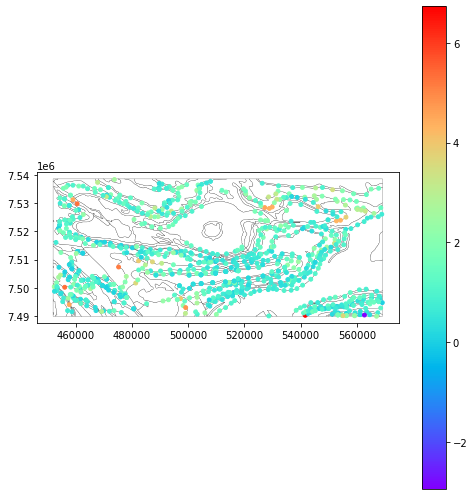

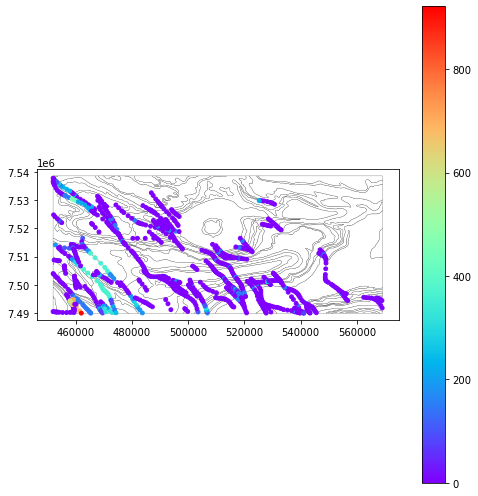

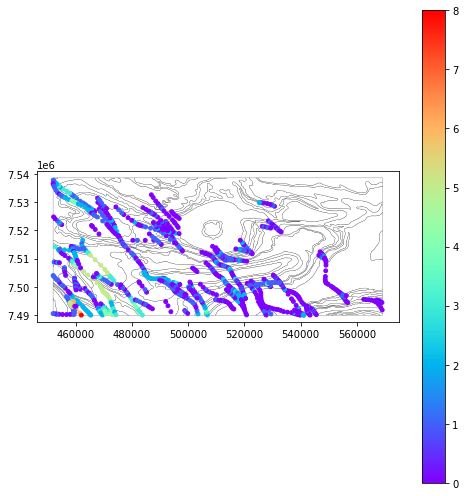

In [81]:
proj.run()

# Converting map2loop output to LoopStructural input

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

All of the faults are extracted from the model and map2loop extracts the vertices from the polyline. The vertices are then used by LoopStructural to define the loremoves all of the faults below a cutoff threshold

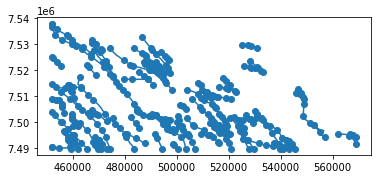

In [85]:
proj.config.faults_clip.plot()
fault_trace = pd.read_csv(proj.config.output_path+'/faults.csv')
fault_orinetations = pd.read_csv(proj.config.output_path+'/fault_orientations.csv')

plt.scatter(fault_trace['X'],fault_trace['Y'])

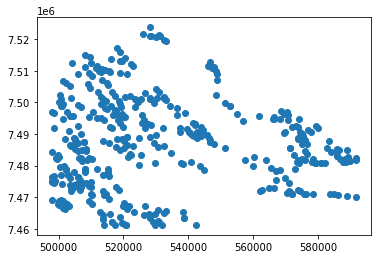

<AxesSubplot:>

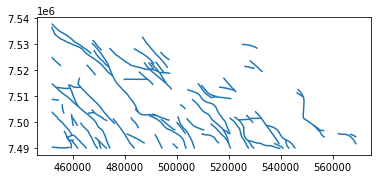

In [54]:
import pandas as pd
contacts_clean = pd.read_csv(proj.config.output_path+'/contacts_clean.csv',index_col='index')
orientations = pd.read_csv(proj.config.output_path+'/contact_orientations.csv')
thicknesses = pd.read_csv(proj.config.output_path+'/formation_summary_thicknesses.csv')
stratigraphic_order = pd.read_csv(proj.config.tmp_path+'/all_sorts.csv',index_col='index')

## Building the stratigraphic dataset

* `contacts_clean` is a table that contains the location and name of the basal contact for a stratigraphic horizon. 
* `stratigraphic_order` is a table that contains the relative stratigraphic column for the map
* `thicknesses` is a table containing the summary of the thicknesses of each stratigraphic unit.
* `orientations` is a table containing the location and strike/dip of a structural observation.

To build an implicit model this dataset needs to be converted into input for LoopStructural. We need to define which geological units are conformable, which will define which units can be represented using different isosurfaces of the same scalar field. To do this we identify a reference horizon and define the relative distance from this reference horizon to every contact by accumulating the thickness of the units. This will define the value of the implicit function that is being interpolated. 

To build this dataset we use the `stratigraphic_order` table which characterises the local stratigraphy for the map by identifying which groups the stratigraphic units are in and the relative location of each stratigraphic unit in the group.  
Where there are multiple groups on the map it is possible to determine whether different groups are conformable. Another file `supergroups.csv` provides this information, each line in this file defines the members of a supergroups. 

When modelling areas with sparse datasets (e.g. primarily from mapsheets) it is often preferable to as many geological interfaces into the same implicit function. This is because the orientation observations, and the geometry of different horizons will help to constrain the other units that may not be as well constrained in the outcrop. 

LoopStructural automatically calculates the value of the implicit function for each stratigraphic unit using the stratigraphic order and the estimated unit thickness from map2loop. The orientation observations constrain the geometry of the geological surface at a particular location. LoopStructural converts the dip and dip direction into a normal vector observation. 

In [55]:
orientations

,X,Y,Z,azimuth,dip,polarity,formation
0,518417.475403,7.494639e+06,522.242291,305.605254,24.942743,1,Jeerinah_Formation
1,516011.179835,7.494796e+06,562.753454,312.332717,24.941626,1,Jeerinah_Formation
2,514659.774908,7.494188e+06,572.592975,308.596969,24.941745,1,Jeerinah_Formation
3,512321.495607,7.492540e+06,615.991638,334.993760,24.941618,1,Jeerinah_Formation
4,510577.065983,7.491477e+06,549.233990,320.154320,24.941474,1,Jeerinah_Formation
...,...,...,...,...,...,...,...
1019,509948.098494,7.496202e+06,617.487966,337.401645,24.938291,1,Mount_McRae_Shale_and_Mount_Sylvia_Formation
1020,507733.128423,7.495210e+06,600.402343,324.469961,24.937574,1,Mount_McRae_Shale_and_Mount_Sylvia_Formation
1021,507537.309287,7.494231e+06,596.318894,328.255242,24.938241,1,Wittenoom_Formation
1022,510642.019241,7.495251e+06,574.432935,150.603764,24.938905,1,Wittenoom_Formation


## Loop Structural

In [76]:
# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']


In [19]:
# checking files are consistent for loopstructural
if(not os.path.exists(proj.config.fault_file_csv)):
    f=open(output_path + '/fault_displacements3.csv','w')
    f.write('X,Y,fname,apparent_displacement,vertical_displacement,downthrow_dir\n')
    f.close()
    f=open(proj.config.output_path + '/fault_orientations.csv','w')
    f.write('X,Y,Z,DipDirection,dip,DipPolarity,formation\n')
    f.close()
    f=open(proj.config.output_path + '/faults.csv','w')
    f.write('X,Y,Z,formation\n')
    f.close()
    f=open(proj.config.output_path + '/fault-fault-relationships.csv','w')
    f.write('fault_id\n')
    f.close()
    f=open(proj.config.output_path + '/group-fault-relationships.csv','w')
    f.write('group\n')
    f.close()
#defining a bounding box
f=open(tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()

In [56]:

fault_params = {'interpolatortype':'FDI',
                'nelements':1e5,
                'step':10,
                'fault_buffer':0.1,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':1e5,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'damp':True}


model, m2l_data = GeologicalModel.from_map2loop_directory(proj.config.project_path,
                                                              evaluate=False,
                                                          fault_params=fault_params,
                                                          rescale=False,
                                                          foliation_params=foliation_params)


In [57]:
model.update()

  0%|          | 0/220 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/pyamg/krylov/_cg.py:155: UserWarning: 
Indefinite preconditioner detected in CG, aborting

  warn("\nIndefinite preconditioner detected in CG, aborting\n")
/opt/conda/lib/python3.7/site-packages/pyamg/krylov/_cg.py:155: UserWarning: 
Indefinite preconditioner detected in CG, aborting

  warn("\nIndefinite preconditioner detected in CG, aborting\n")


In [59]:
view = LavaVuModelViewer(model)
view.add_model_surfaces()
# view.add_data(model['supergroup_0'])
view.interactive()

  0%|          | 0/96 [00:00<?, ?it/s]

2021-04-16 08:45:33,672 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Fault_14303 at 0, skipping
2021-04-16 08:45:33,672 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Fault_14303 at 0, skipping
2021-04-16 08:45:33,672 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Fault_14303 at 0, skipping


No surface found at the given iso value.


2021-04-16 08:45:33,902 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:33,902 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:33,902 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:39,688 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:39,688 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:39,688 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:41,291 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-04-16 08:45:41,291 ~ LoopStructural.visualisation.model_visualis

Adding surfaces took 14.145439147949219 seconds
